**IMPORT LIBRARIES FOR DATA FIXING & EDA**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**GET DATA**

In [2]:
train_df = pd.read_csv('train.csv')


In [4]:
# Let's check head,info & describe for train as we'll be fixing data & doing EDA for train_df first

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EXPLORATORY DATA ANALYSIS (EDA) FOR train DATA

**FOR Missing VALUES**

In [45]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

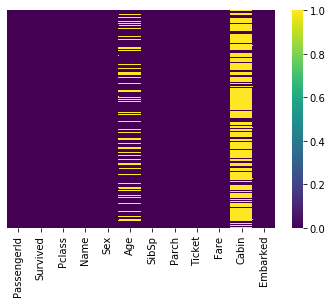

In [46]:
sns.heatmap(train_df.isnull(),cmap='viridis',yticklabels=False)

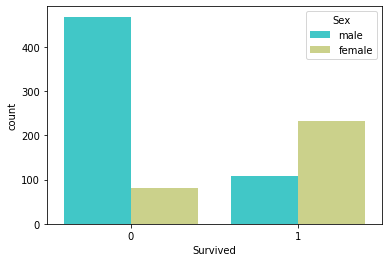

In [47]:
sns.countplot(x='Survived',data=train_df,hue='Sex',palette='rainbow')

In [48]:
train_df[train_df['Survived']==1]['Survived'].sum()

342

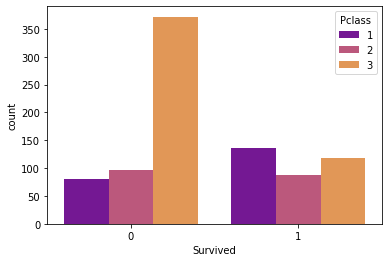

In [49]:
sns.countplot(x='Survived',data=train_df,hue='Pclass',palette='plasma')

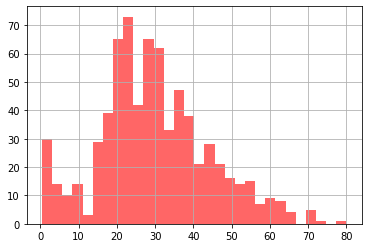

In [50]:
train_df['Age'].hist(bins=30,color='red',alpha=0.6)

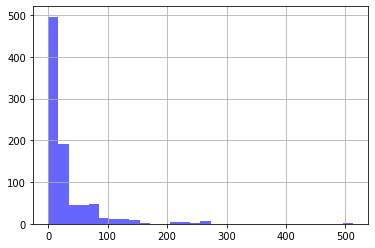

In [51]:
train_df['Fare'].hist(bins=30,color='blue',alpha=0.6)

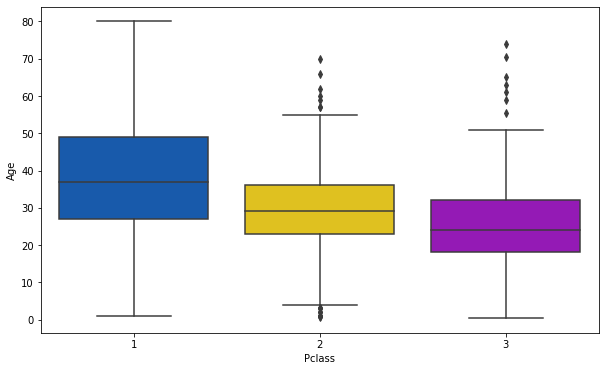

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='prism')

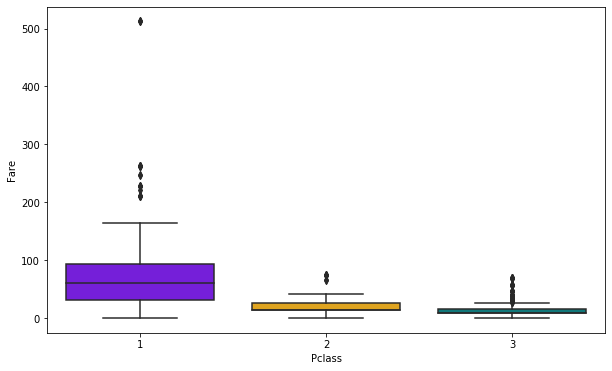

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Fare',data=train_df,palette='prism_r')

# FILLING MISSING VALUES FOR train data

In [54]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
class_1 = train_df[train_df['Pclass']==1]['Age'].mean()
class_2 = train_df[train_df['Pclass']==2]['Age'].mean()
class_3 = train_df[train_df['Pclass']==3]['Age'].mean()

In [56]:
train_df.loc[(train_df['Age'].isnull()) & (train_df['Pclass']==1), 'Age']=class_1
train_df.loc[(train_df['Age'].isnull()) & (train_df['Pclass']==2), 'Age']=class_2
train_df.loc[(train_df['Age'].isnull()) & (train_df['Pclass']==3), 'Age']=class_3

In [57]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
train_df.drop('Cabin',axis=1,inplace=True)

In [59]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [60]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [61]:
train_df['Embarked'].mode()[0]

'S'

In [62]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [63]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

NOW WE'LL DO SOME OPERATIONS TO FIX test-df LIKE AS DID FOR train_df

# CONVERTING CATEGORICAL VARIABLES

**FOR train DATA**

In [64]:
Sex = pd.get_dummies(train_df['Sex'],drop_first=True)
Embark = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [65]:
train_df.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [66]:
train_df = pd.concat([train_df,Sex,Embark],axis=1)

In [67]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Spliting Data for Model

In [80]:
X = train_df[['Pclass','male','Age']]
y = train_df['Survived']

from sklearn.model_selection import train_test_split


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

### Model Selection and Processing

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logmodel = LogisticRegression()

In [87]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluation

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[153  22]
 [ 34  86]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       175
           1       0.80      0.72      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



# Decision Tree

### Model Selection and Processing


In [91]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Predictions and Evaluation

In [92]:
pred_tree = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred_tree))
print(classification_report(y_test,pred_tree))


[[148  27]
 [ 41  79]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       175
           1       0.75      0.66      0.70       120

    accuracy                           0.77       295
   macro avg       0.76      0.75      0.76       295
weighted avg       0.77      0.77      0.77       295

